# Introduction of Signal Processing 


Signal processing is a crucial aspect of seismology that involves analyzing and interpreting seismic data to understand the underlying geological processes. Seismic signals, recorded by seismometers, contain valuable information about earthquakes, volcanic eruptions, and other seismic events. We can extract meaningful insights from these raw data by applying various signal-processing techniques.

**Objectives of this Notebook**
This notebook aims to introduce the basics of signal processing in the context of seismology. We will cover essential techniques and demonstrate how to apply them to real seismic data. By the end of this notebook, you will be able to:

- **Download and visualize seismic data** from well-known sources using the ObsPy client.
- **Apply basic signal processing techniques** such as filtering and Fourier Transform to seismic signals.
- **Visualize the processed signals** to understand their characteristics.
- **Explore advanced signal processing methods** like wavelet transforms and spectrograms for more detailed analysis.

**Author:** Marc Garcia, University of Texas - El Paso, magarcia58@miners.utep.edu

In [2]:
#Check for correct Image (GeoLab)
!printenv | grep IMAGE

JUPYTER_IMAGE=public.ecr.aws/earthscope-dev/geolab:td-dev-dd5851e6
DASK_GATEWAY__CLUSTER__OPTIONS__IMAGE={JUPYTER_IMAGE_SPEC}
JUPYTER_IMAGE_SPEC=public.ecr.aws/earthscope-dev/geolab:td-dev-dd5851e6


# 1. Introduction and Data Acquisition

To illustrate the basics of signal processing in seismology, we will use the seismic data from the 2017 Chiapas, Mexico earthquake. This earthquake, which occurred on September 8, 2017, had a magnitude of 8.2 and was one of the most powerful recorded in Mexico, causing significant damage and casualties. We will retrieve this teleseismic signal from the ANMO station in Albuquerque, New Mexico, USA. Teleseismic signals are seismic waves that have traveled a long distance from the earthquake source and have been used to provide valuable information about the Earth's interior.

Event time: 2017-09-08T04:49:19.000000Z
Location: (15.022, -93.899)
Magnitude: 8.2
1 Trace(s) in Stream:
IU.ANMO.00.BH1 | 2017-09-08T04:49:19.019538Z - 2017-09-08T05:49:18.969538Z | 20.0 Hz, 72000 samples


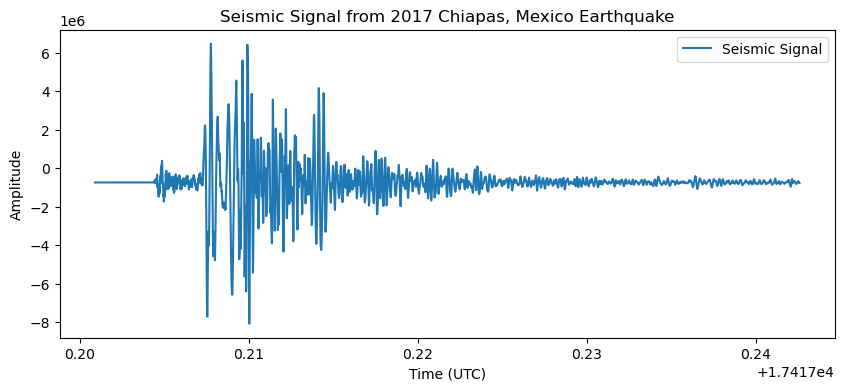

In [3]:
# Import libraries
from obspy import read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt

# Set up the FDSN client for IRIS
client = Client("IRIS")

# Define the event time and location
origin_time = UTCDateTime("2017-09-08T04:49:19")
latitude = 15.022
longitude = -93.899
magnitude = 8.2

# Print event details
print(f"Event time: {origin_time}")
print(f"Location: ({latitude}, {longitude})")
print(f"Magnitude: {magnitude}")

# Define the network, station, location, and channel codes
network = "IU"  # Global Seismographic Network
station = "ANMO"  # Albuquerque, New Mexico, USA
location = "00"
channel = "BH1"

# Define the time range for the data request
start_time = origin_time
end_time = origin_time + 3600  # 1 hour of data

# Fetch the waveform data
st = client.get_waveforms(network, station, location, channel, start_time, end_time)

# Print the stream details
print(st)

# Plot the seismic signal
plt.figure(figsize=(10, 4))
plt.plot(st[0].times("matplotlib"), st[0].data, label='Seismic Signal')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude')
plt.title('Seismic Signal from 2017 Chiapas, Mexico Earthquake')
plt.legend()
plt.show()


# 2. Applying Basic Signal Processing Techniques 

Filtering is an essential signal processing technique used to isolate specific frequency components of a signal. The main types of filters we will explore are:

- **Low-pass filter:** Allows frequencies below a certain cutoff frequency to pass through and attenuates frequencies above the cutoff.
- **High-pass filter:** Allows frequencies above a certain cutoff frequency to pass through and attenuates frequencies below the cutoff.
- **Band-pass filter:** Allows frequencies within a specific range (between a lower and upper cutoff frequency) to pass through and attenuates frequencies outside this range.

## Applying Low-pass Filter
A low-pass filter removes high-frequency noise and retains the low-frequency components of the signal.

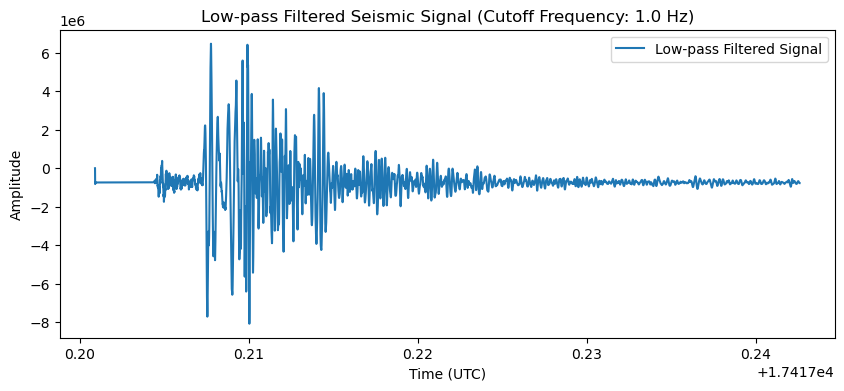

In [3]:
from obspy.signal.filter import lowpass

# Define the cutoff frequency for the low-pass filter
low_cutoff = 1.0  # Hz

# Apply the low-pass filter to the seismic data
lowpass_trace = lowpass(st[0].data, low_cutoff, st[0].stats.sampling_rate)

# Plot the low-pass filtered signal
plt.figure(figsize=(10, 4))
plt.plot(st[0].times("matplotlib"), lowpass_trace, label='Low-pass Filtered Signal')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude')
plt.title(f'Low-pass Filtered Seismic Signal (Cutoff Frequency: {low_cutoff} Hz)')
plt.legend()
plt.show()


## Applying High-pass Filter
A high-pass filter removes low-frequency noise and retains the high-frequency components of the signal.

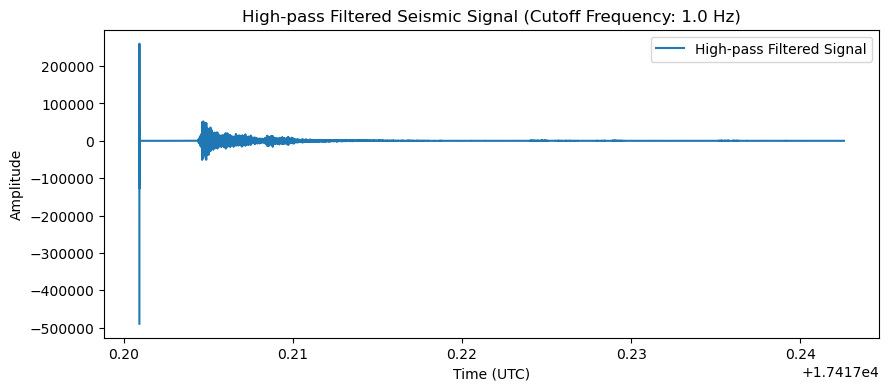

In [4]:
from obspy.signal.filter import highpass

# Define the cutoff frequency for the high-pass filter
high_cutoff = 1.0  # Hz

# Apply the high-pass filter to the seismic data
highpass_trace = highpass(st[0].data, high_cutoff, st[0].stats.sampling_rate)

# Plot the high-pass filtered signal
plt.figure(figsize=(10, 4))
plt.plot(st[0].times("matplotlib"), highpass_trace, label='High-pass Filtered Signal')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude')
plt.title(f'High-pass Filtered Seismic Signal (Cutoff Frequency: {high_cutoff} Hz)')
plt.legend()
plt.show()


## Applying Band-pass Filter
A band-pass filter retains frequencies within a specific range and removes frequencies outside this range.

In [1]:
from obspy.signal.filter import bandpass
import matplotlib.pyplot as plt

# Determine the Nyquist frequency
nyquist_freq = st[0].stats.sampling_rate / 2.0

# Define the frequency range for the band-pass filter
freqmin = .5  # Minimum frequency
freqmax = nyquist_freq * 0.9 

# Apply the band-pass filter to the seismic data
bandpass_trace = bandpass(st[0].data, freqmin, freqmax, st[0].stats.sampling_rate)

# Plot the band-pass filtered signal
plt.figure(figsize=(10, 4))
plt.plot(st[0].times("matplotlib"), bandpass_trace, label='Band-pass Filtered Signal')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude')
plt.title(f'Band-pass Filtered Seismic Signal (Frequency Range: {freqmin} - {freqmax:.2f} Hz)')
plt.legend()
plt.show()



NameError: name 'st' is not defined

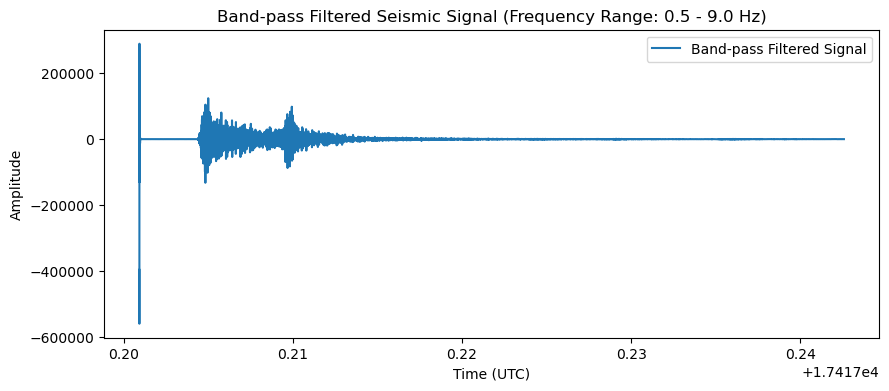

In [11]:
import numpy as np
from obspy.signal.filter import bandpass
import matplotlib.pyplot as plt

# Determine the Nyquist frequency
nyquist_freq = st[0].stats.sampling_rate / 2.0

# Define the frequency range for the band-pass filter
freqmin = 0.5  # Minimum frequency
freqmax = nyquist_freq * 0.9  # Slightly below Nyquist frequency

# Zero-padding
pad_length = 1000  # Adjust padding length as needed
padded_data = np.pad(st[0].data, pad_length, mode='constant')

# Apply the band-pass filter to the padded seismic data
padded_bandpass_trace = bandpass(padded_data, freqmin, freqmax, st[0].stats.sampling_rate)

# Remove padding after filtering
bandpass_trace = padded_bandpass_trace[pad_length:-pad_length]

# Plot the band-pass filtered signal
plt.figure(figsize=(10, 4))
plt.plot(st[0].times("matplotlib"), bandpass_trace, label='Band-pass Filtered Signal')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude')
plt.title(f'Band-pass Filtered Seismic Signal (Frequency Range: {freqmin} - {freqmax} Hz)')
plt.legend()
plt.show()
